In [1]:
import pandas as pd
import os

current_dir = os.getcwd()
data_path = current_dir+'\\SafeDriver\\'
train_data = pd.read_csv(data_path+'train.csv')
test_data = pd.read_csv(data_path+'test.csv')

In [2]:
train_data.shape, test_data.shape

((595212, 59), (892816, 58))

In [3]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
test_data.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


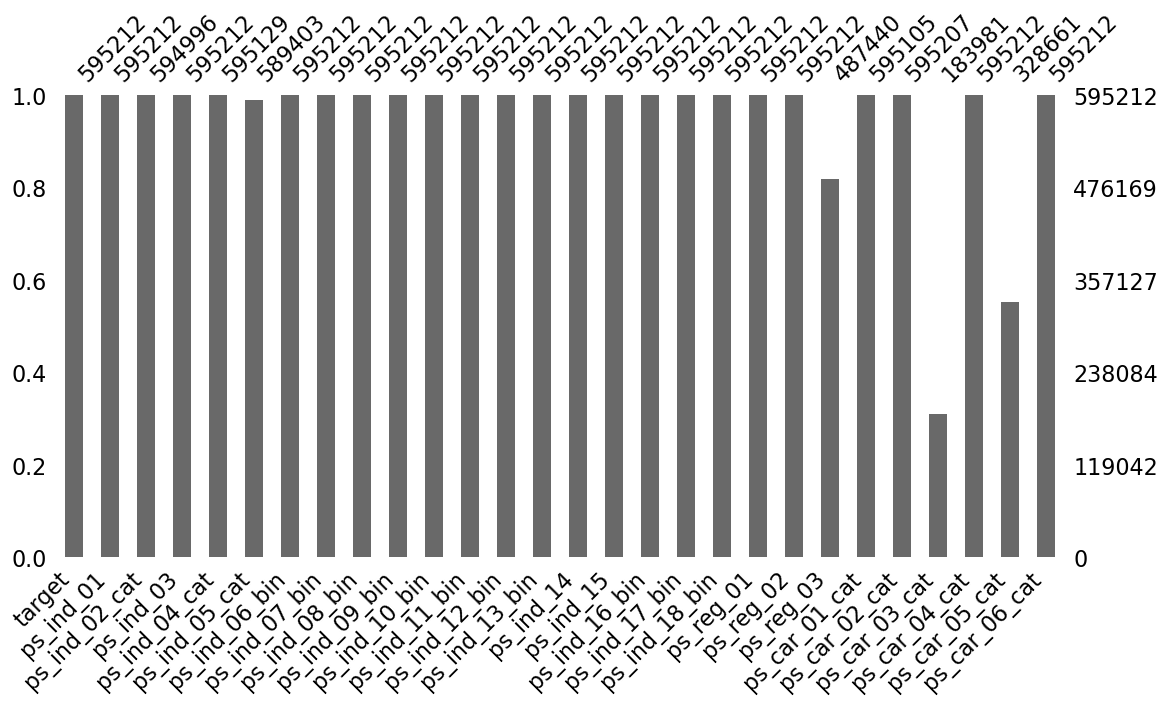

In [6]:
import numpy as np
import missingno as msno

train_copy = train_data.copy().replace(-1, np.NaN)
msno.bar(df=train_copy.iloc[:,1:29], figsize=(13,6));

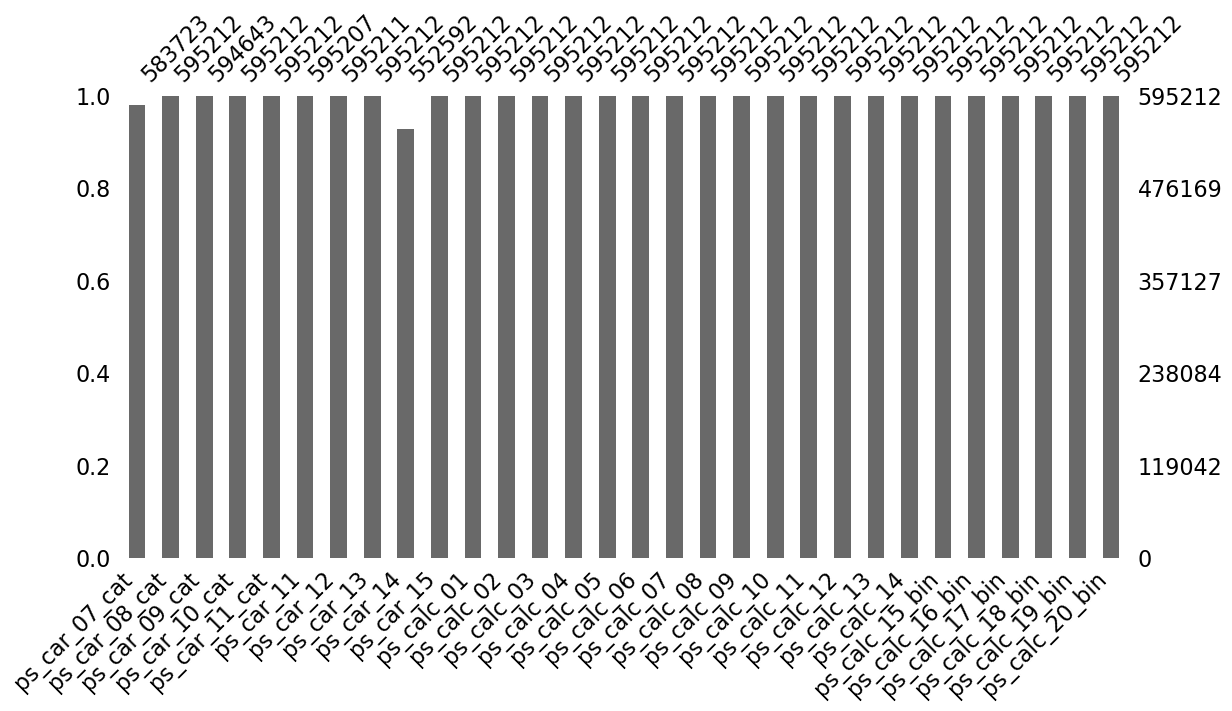

In [7]:
msno.bar(df=train_copy.iloc[:,29:], figsize=(13,6));

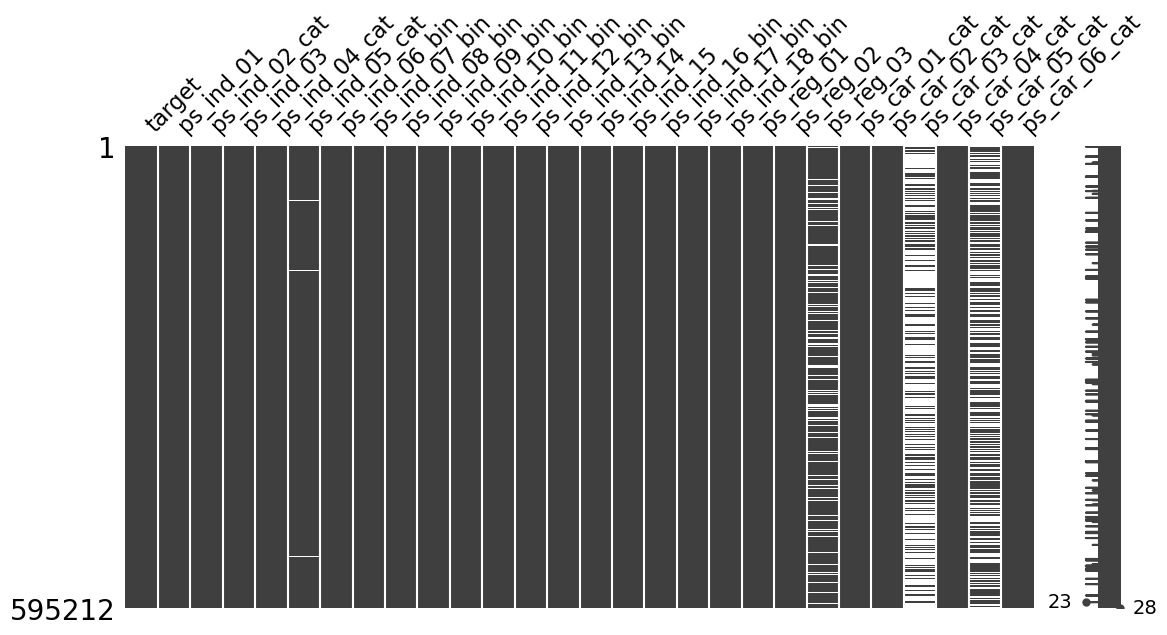

In [8]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

In [9]:
def resumetable(df):
    print(f'Shape of data: {df.shape}')
    summary= pd.DataFrame(df.dtypes, columns=['Data type'])
    summary['Num missing'] =(df==-1).sum().values
    summary['Num unique'] = df.nunique().values
    summary['data type'] = None
    for col in df.columns:
        if 'bin' in col or col =='target':
            summary.loc[col, "data type"] = 'binary'
        elif 'cat' in col:
            summary.loc[col, "data type"] = 'category'
        elif df[col].dtype == "int64":
            summary.loc[col, "data type"] = 'ordinal'
        elif df[col].dtype == float:
            summary.loc[col, "data type"] = 'continuous'
       
    return summary

In [10]:
summary = resumetable(train_data)
summary

Shape of data: (595212, 59)


,Data type,Num missing,Num unique,data type
id,int64,0,595212,ordinal
target,int64,0,2,binary
ps_ind_01,int64,0,8,ordinal
ps_ind_02_cat,int64,216,5,category
ps_ind_03,int64,0,12,ordinal
ps_ind_04_cat,int64,83,3,category
ps_ind_05_cat,int64,5809,8,category
ps_ind_06_bin,int64,0,2,binary
ps_ind_07_bin,int64,0,2,binary
ps_ind_08_bin,int64,0,2,binary


In [11]:
# Data exploration using data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

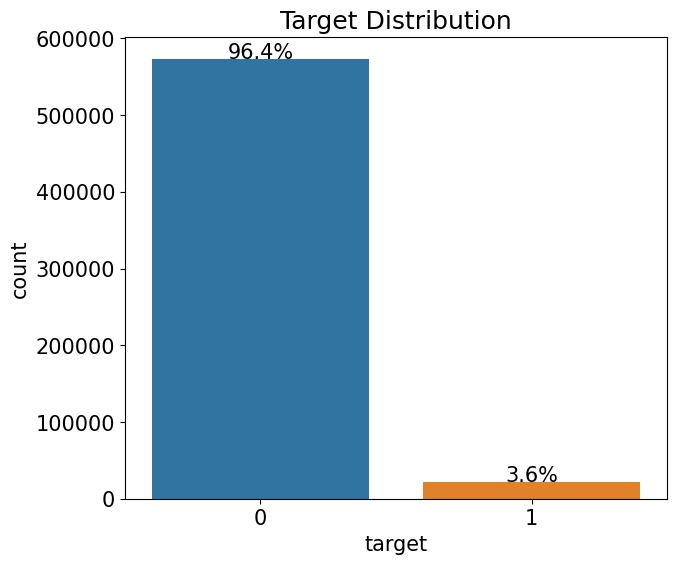

In [12]:
def write_percent(ax, total_size): 
    for patch in ax.patches:
        height = patch.get_height() 
        width = patch.get_width() 
        left_coord = patch.get_x() 
        percent = height/total_size*100 

        ax.text(left_coord + width/2.0, height + total_size*0.001, 
                '{:1.1f}%'.format(percent), ha='center')

mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))
ax = sns.countplot(x='target', data=train_data)
write_percent(ax, len(train_data)) 
ax.set_title('Target Distribution');

In [13]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12, 18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size) 
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.3, hspace=0.3) 
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

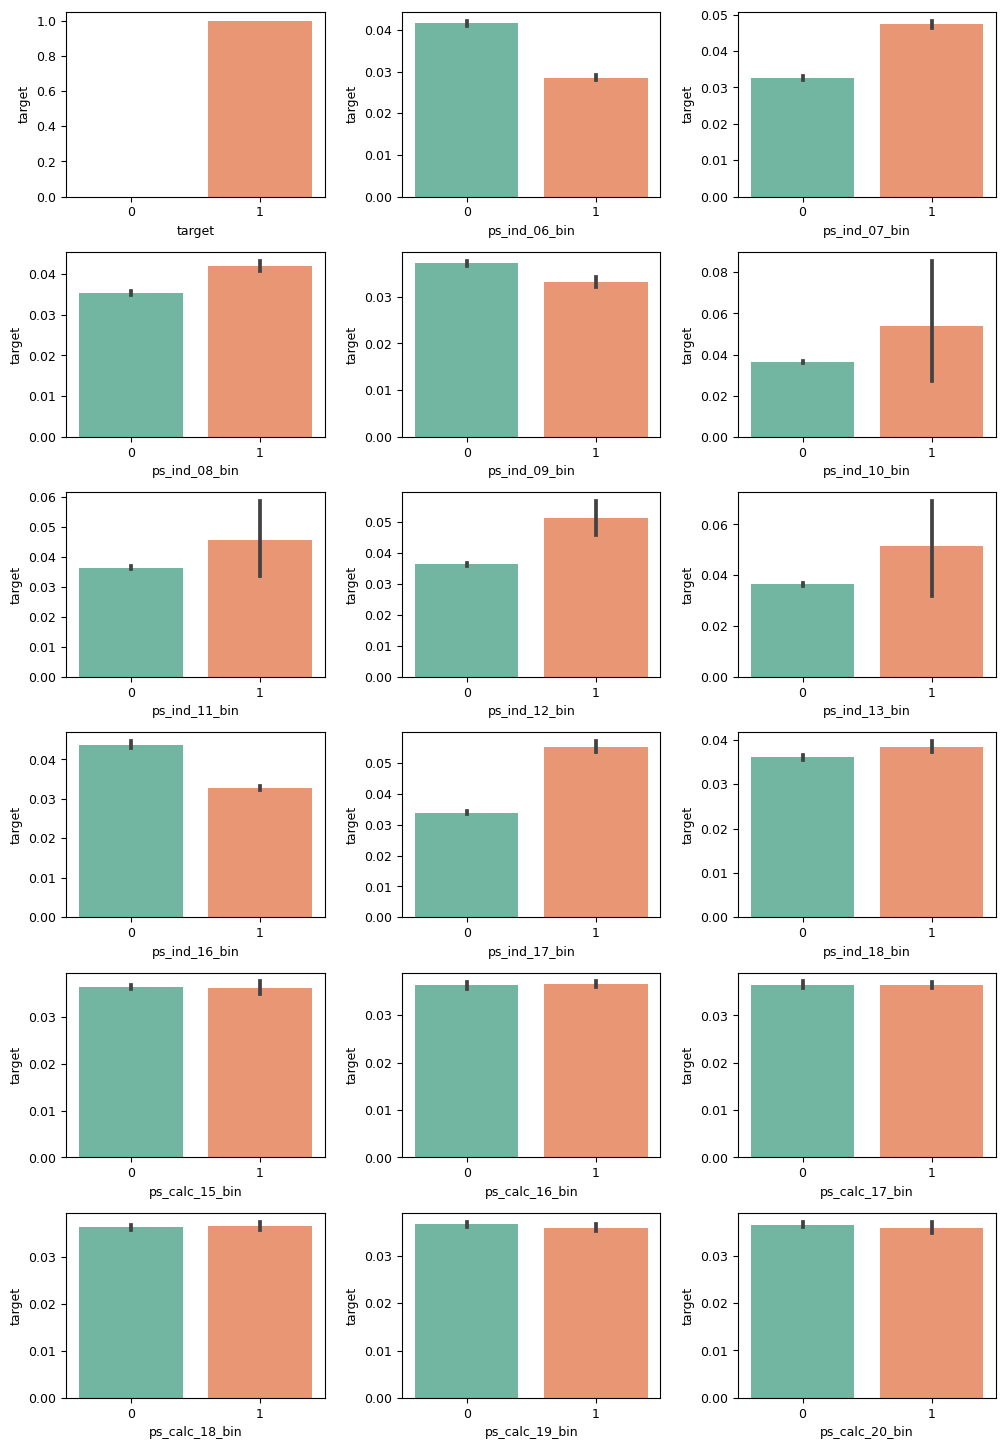

In [14]:
bin_features = summary[summary['data type'] == 'binary'].index 
plot_target_ratio_by_features(train_data, bin_features, 6, 3) 

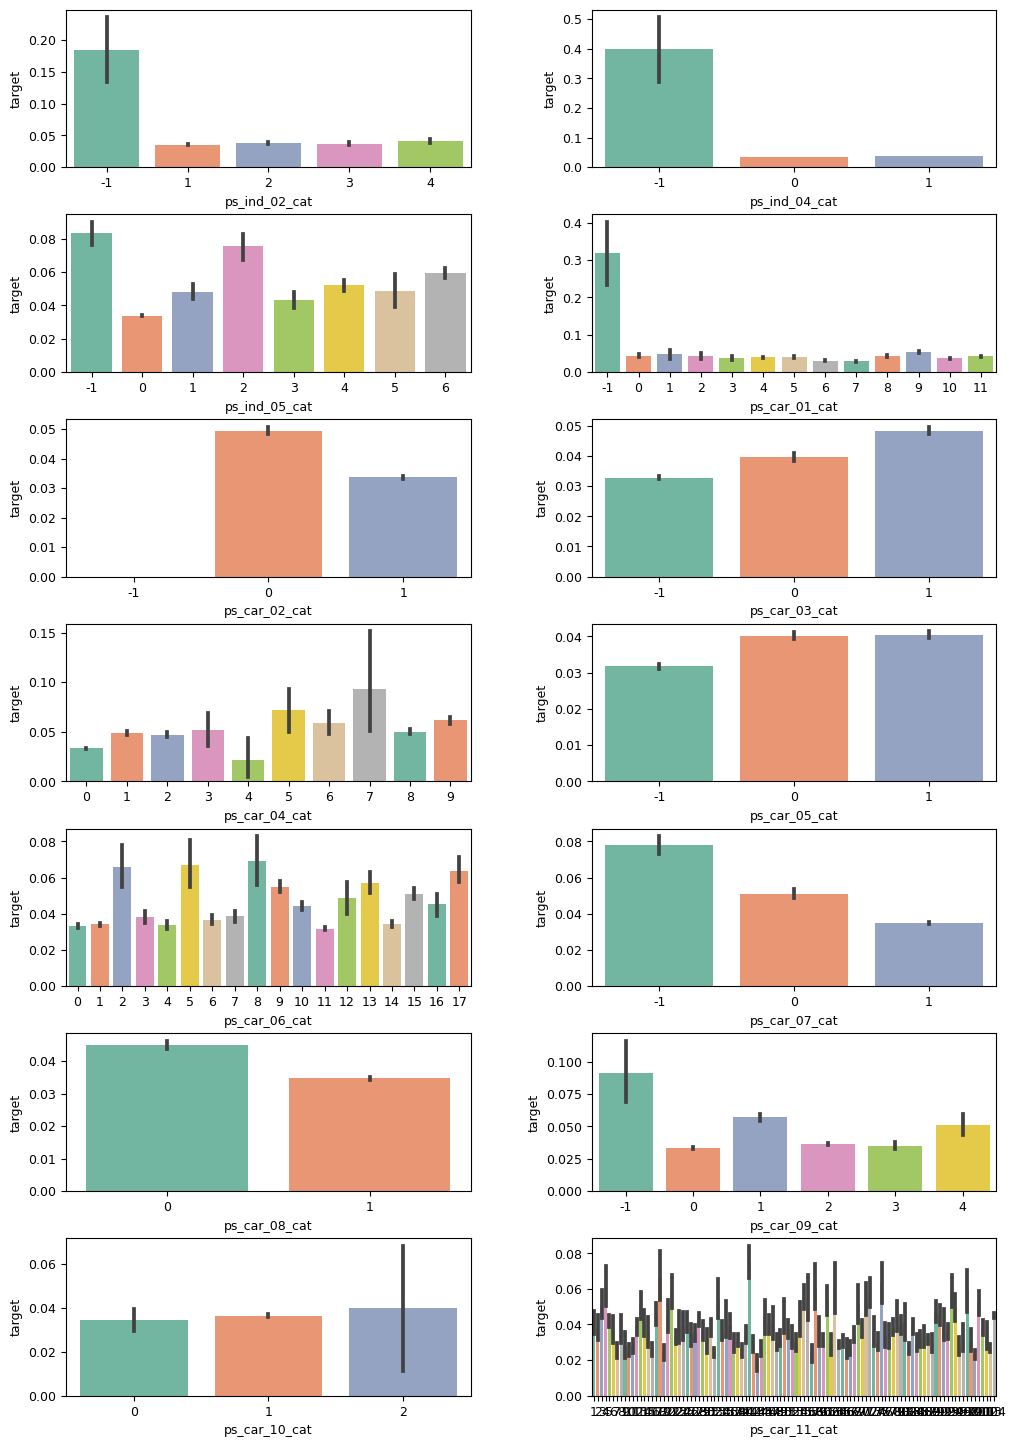

In [15]:
cat_features = summary[summary['data type'] == 'category'].index 
plot_target_ratio_by_features(train_data, cat_features, 7, 2) 

In [ ]:
ord_features = summary[summary['data type'] == 'ordinal'].index 
plot_target_ratio_by_features(train_data, ord_features, 8, 2, (12,20)) 

C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

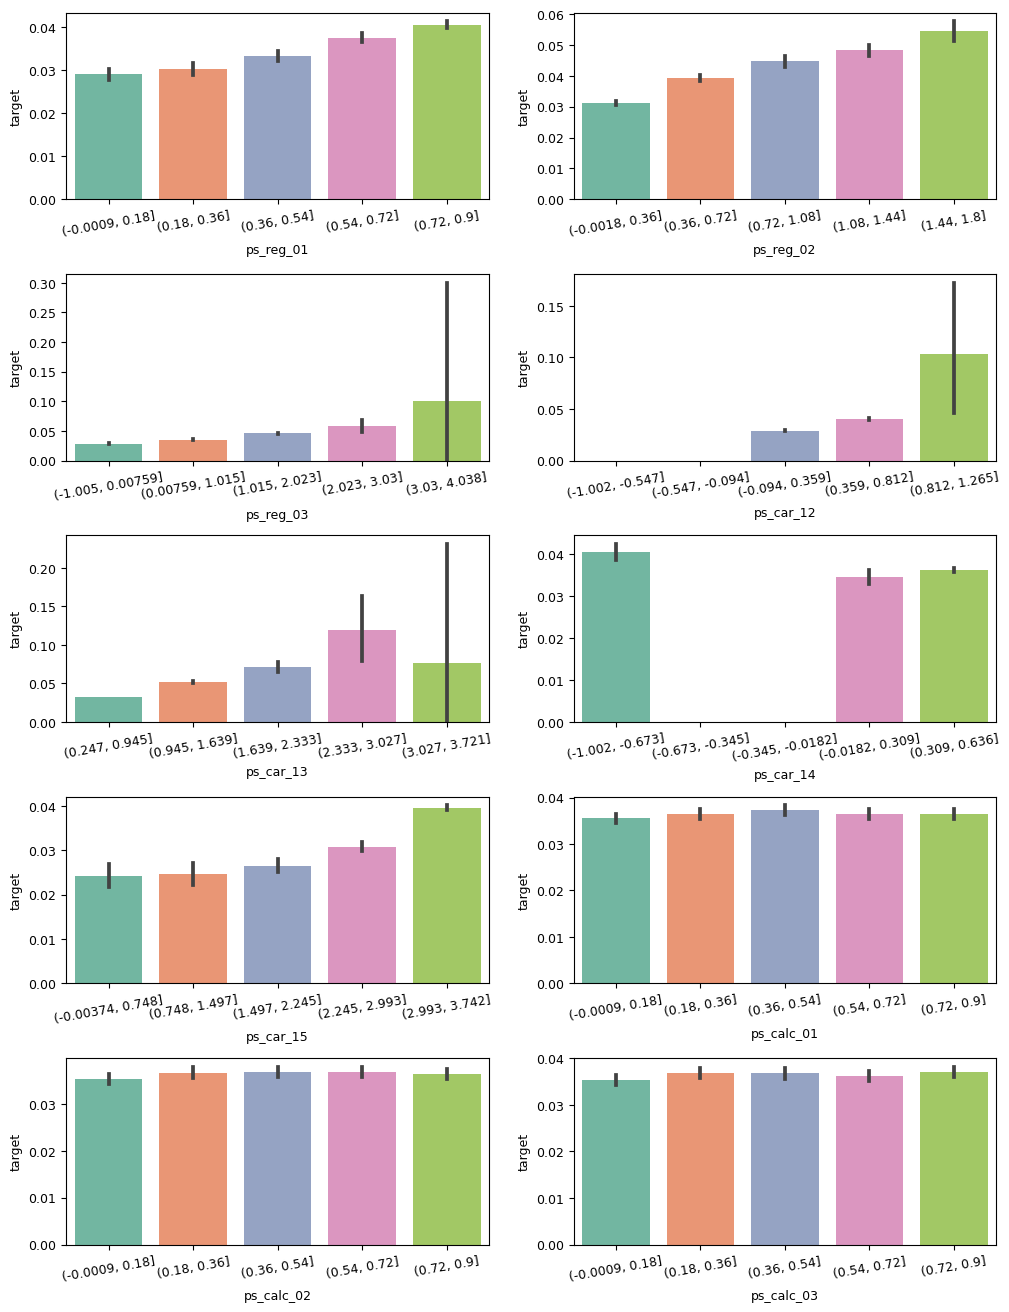

In [17]:
cont_features = summary[summary['data type']=='continuous'].index

plt.figure(figsize =(12,16))
grid = gridspec.GridSpec(5,2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature  in enumerate(cont_features):
    train_data[cont_feature] = pd.cut(train_data[cont_feature],5)
    
    ax= plt.subplot(grid[idx])
    sns.barplot(x=cont_feature, y='target', data= train_data, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation =10)

In [18]:
train_copy = train_copy.dropna()

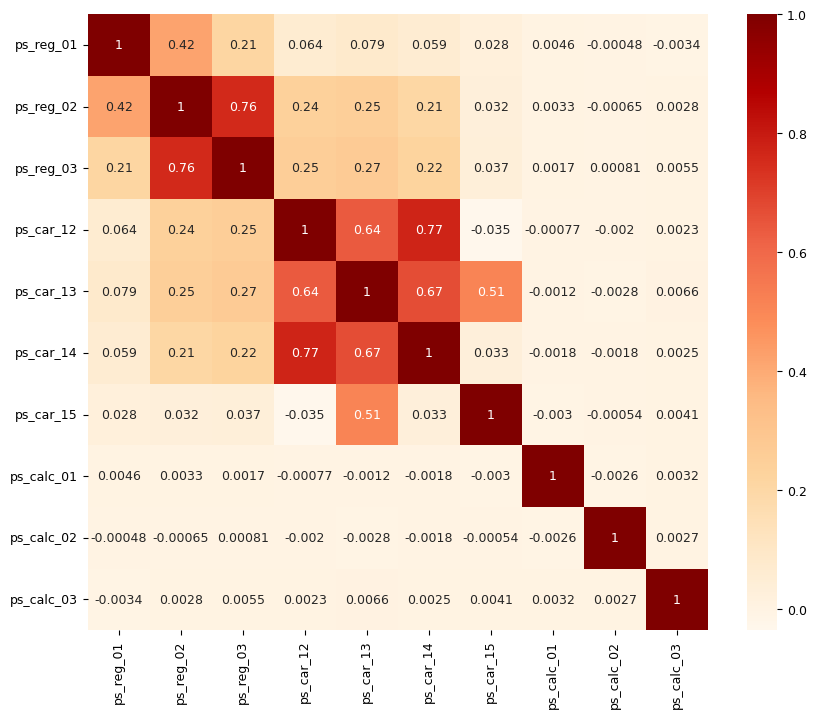

In [19]:
plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr() 
sns.heatmap(cont_corr, annot=True, cmap='OrRd');

In [20]:
#Baseline model

current_dir = os.getcwd()
data_path = current_dir+'\\SafeDriver\\'
train_data = pd.read_csv(data_path+'train.csv')
test_data = pd.read_csv(data_path+'test.csv')

all_data = pd.concat([train_data, test_data], ignore_index= True)
all_data = all_data.drop('target', axis=1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
all_features = all_data.columns 
cat_features = [feature for feature in all_features if 'cat' in feature]
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])
encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [25]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

remaining_features = [feature for feature in all_features 
                      if ('cat' not in feature and 
                          'calc' not in feature and
                          feature not in drop_features)]

In [26]:
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format='csr')

In [28]:
num_train = len(train_data)
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train_data['target'].values

In [30]:
# function for compute Gini coefficient
import numpy as np

def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    
    n_samples = y_true.shape[0]
    L_mid = np.linspace(1/n_samples, 1, n_samples)
    
    pred_order = y_true[y_pred.argsort()]
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) 
    G_pred = np.sum(L_mid - L_pred)

    true_order = y_true[y_true.argsort()]
    L_true = np.cumsum(true_order) / np.sum(true_order) 
    G_true = np.sum(L_mid - L_true) 

    return G_pred / G_true

In [31]:
def gini(preds, dtrain):
    labels = dtrain.get_label() 
    return 'gini', eval_gini(labels, preds), True

In [32]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True)

In [33]:
params = {'objective': 'binary', 'learning_rate': 0.01, 'force_row_wise': True, 'random_state': 0}
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

In [39]:
import lightgbm as lgb

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)): # 1
    print('#'*40, f'fold {idx+1} / fold {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx] # training data
    X_valid, y_valid = X[valid_idx], y[valid_idx] # valicating data

    dtrain = lgb.Dataset(X_train, y_train) # data for LightGBM train
    dvalid = lgb.Dataset(X_valid, y_valid) # data for LightGBM validation
    
    # LightGBM training
    lgb_model = lgb.train(params=params, # parameters for training
    train_set=dtrain, # training data set
    num_boost_round=1000, # number of boosting repeat
    valid_sets=dvalid, # validating data set
    feval=gini, # for computing Gini score
    callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(100)]) # printing every 100 eval
    
    # OOF prediction
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # computing Gini Score
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'fold {idx+1} Gini score: {gini_score}\n')

######################################## fold 1 / fold 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153202	valid_0's gini: 0.268607
[200]	valid_0's binary_logloss: 0.152289	valid_0's gini: 0.278346
[300]	valid_0's binary_logloss: 0.151886	valid_0's gini: 0.284709
[400]	valid_0's binary_logloss: 0.15171	valid_0's gini: 0.287159
[500]	valid_0's binary_logloss: 0.151655	valid_0's gini: 0.287923
[600]	valid_0's binary_logloss: 0.151618	valid_0's gini: 0.2885
[700]	valid_0's binary_logloss: 0.151595	valid_0's gini: 0.288864
[800]	valid_0's binary_logloss: 0.151595	valid

In [40]:
print('Gini for OOF validation:', eval_gini(y, oof_val_preds))

Gini for OOF validation: 0.2795745903779882


In [41]:
#Model improvement steps

current_dir = os.getcwd()
data_path = current_dir+'\\SafeDriver\\'
train_data = pd.read_csv(data_path+'train.csv')
test_data = pd.read_csv(data_path+'test.csv')

all_data = pd.concat([train_data, test_data], ignore_index= True)
all_data = all_data.drop('target', axis=1)
all_features = all_data.columns

cat_features = [feature for feature in all_features if 'cat' in feature]
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

In [49]:
#adding number of missing feature
all_data['num_missing'] = (all_data==-1).sum(axis=1)
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)]
remaining_features.append('num_missing')

In [50]:
ind_features = [feature for feature in all_features if 'ind' in feature]
is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [46]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [51]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
 encoded_cat_matrix], format='csr')

In [52]:
num_train = len(train_data) 
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train_data['target'].values

In [53]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [54]:
param_bounds = {'num_leaves': (30, 40),
 'lambda_l1': (0.7, 0.9),
 'lambda_l2': (0.9, 1),
 'feature_fraction': (0.6, 0.7),
 'bagging_fraction': (0.6, 0.9),
 'min_child_samples': (6, 10),
 'min_child_weight': (10, 40)}

fixed_params = {'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1, 
 'force_row_wise': True} 

In [55]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
 bagging_fraction, min_child_samples, min_child_weight):
    # Gini score computation function
    # bayesian optimization range
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    params.update(fixed_params)

    print('hyper parameters:', params)

    
    # training with LightGBM 
    lgb_model = lgb.train(params=params,
                          train_set=bayes_dtrain,
                          num_boost_round=2500,
                          valid_sets=bayes_dvalid,
                          feval=gini,
                          early_stopping_rounds=300,
                          verbose_eval=False)
    
    # Predict with the trained model
    preds = lgb_model.predict(X_valid)
    # compute Gini score
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

In [56]:
from bayes_opt import BayesianOptimization

# Object for BayesianOptimization
optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds)
optimizer.maximize(init_points=3, n_iter=6)

max_params = optimizer.max['params']
max_params

ModuleNotFoundError: No module named 'bayes_opt'

In [57]:
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
max_params.update(fixed_params)

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement bayes_opt (from versions: none)
ERROR: No matching distribution found for bayes_opt


In [59]:
max_params={'bagging_fraction': 0.6213108174593661,
 'feature_fraction': 0.608712929970154,
 'lambda_l1': 0.7040436794880651,
 'lambda_l2': 0.9832619845547939,
 'min_child_samples': 9,
 'min_child_weight': 36.10036444740457,
 'num_leaves': 40,
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wise': True}

In [61]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True)
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)): 
    print('#'*40, f'fold {idx+1} / fold {folds.n_splits}', '#'*40)
   

    X_train, y_train = X[train_idx], y[train_idx] 
    X_valid, y_valid = X[valid_idx], y[valid_idx] 

    dtrain = lgb.Dataset(X_train, y_train) 
    dvalid = lgb.Dataset(X_valid, y_valid) 
    
    lgb_model = lgb.train(params=max_params, 
                          train_set=dtrain, 
                          num_boost_round=2500,
                          valid_sets=dvalid, 
                          feval=gini, 
                          callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(100)]) 
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'fold {idx+1} GiniScore: {gini_score}\n')


######################################## fold 1 / fold 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.154228	valid_0's gini: 0.266966
[200]	valid_0's binary_logloss: 0.15317	valid_0's gini: 0.271922
[300]	valid_0's binary_logloss: 0.152598	valid_0's gini: 0.275403
[400]	valid_0's binary_logloss: 0.152255	valid_0's gini: 0.278404
[500]	valid_0's binary_logloss: 0.152043	valid_0's gini: 0.281009
[600]	valid_0's binary_logloss: 0.151913	valid_0's gini: 0.282746
[700]	valid_0's binary_logloss: 0.151797	valid_0's gini: 0.284988
[800]	valid_0's binary_logloss: 0.151723	val

[800]	valid_0's binary_logloss: 0.151611	valid_0's gini: 0.293821
[900]	valid_0's binary_logloss: 0.151558	valid_0's gini: 0.294733
[1000]	valid_0's binary_logloss: 0.151522	valid_0's gini: 0.295373
[1100]	valid_0's binary_logloss: 0.151494	valid_0's gini: 0.295849
[1200]	valid_0's binary_logloss: 0.151469	valid_0's gini: 0.29637
[1300]	valid_0's binary_logloss: 0.151455	valid_0's gini: 0.296632
[1400]	valid_0's binary_logloss: 0.151448	valid_0's gini: 0.296741
[1500]	valid_0's binary_logloss: 0.151439	valid_0's gini: 0.296996
[1600]	valid_0's binary_logloss: 0.151433	valid_0's gini: 0.297203
Early stopping, best iteration is:
[1594]	valid_0's binary_logloss: 0.151431	valid_0's gini: 0.297254
fold 5 GiniScore: 0.2972535097140372



In [62]:
print('Gini for OOF validation:', eval_gini(y, oof_val_preds))

Gini for OOF validation: 0.2879517062731148


In [63]:
# XGBoost
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [65]:
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9),
                'colsample_bytree': (0.7, 1.0),
                'min_child_weight': (5, 7),
                'gamma': (8, 11),
                'reg_alpha': (7, 9),
                'reg_lambda': (1.1, 1.5),
                'scale_pos_weight': (1.4, 1.6)}

fixed_params = {'objective': 'binary:logistic',
                'learning_rate': 0.02}

In [66]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
 reg_alpha, gamma, reg_lambda, scale_pos_weight):



    params = {'max_depth': int(round(max_depth)),
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'gamma': gamma,
              'reg_alpha':reg_alpha,
              'reg_lambda': reg_lambda,
              'scale_pos_weight': scale_pos_weight}
    params.update(fixed_params)
    print('하이퍼파라미터 :', params)
    xgb_model = xgb.train(params=params,
                          dtrain=bayes_dtrain,
                          num_boost_round=2000,
                          evals=[(bayes_dvalid, 'bayes_dvalid')], 
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=False)
    best_iter = xgb_model.best_iteration 
    preds = xgb_model.predict(bayes_dvalid,
                              iteration_range=(0, best_iter)) 
    gini_score = eval_gini(y_valid, preds)
    print(f'GiniScore : {gini_score}\n')
    
    return gini_score

In [ ]:
optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)
optimizer.maximize(init_points=3, n_iter=6)
max_params = optimizer.max['params']

In [67]:
max_params ={'colsample_bytree': 0.8843124587484356,
 'gamma': 10.452246227672624,
 'max_depth': 7,
 'min_child_weight': 6.494091293383359,
 'reg_alpha': 8.551838810159788,
 'reg_lambda': 1.3814765995549108,
 'scale_pos_weight': 1.423280772455086,
 'subsample': 0.7001630536555632,
 'objective': 'binary:logistic',
 'learning_rate': 0.02}

In [70]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True)
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)): 
    print('#'*40, f'fold {idx+1} / fold {folds.n_splits}', '#'*40)
   

    X_train, y_train = X[train_idx], y[train_idx] 
    X_valid, y_valid = X[valid_idx], y[valid_idx] 

    dtrain = xgb.DMatrix(X_train, y_train) 
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    
    xgb_model = xgb.train(params=max_params,
                          dtrain=dtrain,
                          num_boost_round=2000,
                          evals=[(dvalid, 'valid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=100)
    
    best_iter = xgb_model.best_iteration
    oof_test_preds += xgb_model.predict(dtest,
                                        iteration_range=(0, best_iter))/folds.n_splits
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, iteration_range=(0, best_iter))
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'fold {idx+1} GiniScore: {gini_score}\n')

######################################## fold 1 / fold 5 ########################################


C:\Users\bluea\anaconda3\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	valid-logloss:0.21743	valid-gini:0.20176
[100]	valid-logloss:0.16014	valid-gini:0.26419
[200]	valid-logloss:0.15495	valid-gini:0.27794
[300]	valid-logloss:0.15424	valid-gini:0.28272
[400]	valid-logloss:0.15414	valid-gini:0.28373
[500]	valid-logloss:0.15412	valid-gini:0.28422
[600]	valid-logloss:0.15410	valid-gini:0.28448
[700]	valid-logloss:0.15409	valid-gini:0.28471
[800]	valid-logloss:0.15409	valid-gini:0.28478
[900]	valid-logloss:0.15408	valid-gini:0.28486
[1000]	valid-logloss:0.15408	valid-gini:0.28499
[1100]	valid-logloss:0.15407	valid-gini:0.28503
[1200]	valid-logloss:0.15407	valid-gini:0.28514
[1300]	valid-logloss:0.15407	valid-gini:0.28538
[1400]	valid-logloss:0.15405	valid-gini:0.28540
[1500]	valid-logloss:0.15405	valid-gini:0.28543
[1600]	valid-logloss:0.15406	valid-gini:0.28551
[1700]	valid-logloss:0.15406	valid-gini:0.28566
[1800]	valid-logloss:0.15404	valid-gini:0.28568
[1900]	valid-logloss:0.15405	valid-gini:0.28575
[1999]	valid-logloss:0.15404	valid-gini:0.28586
fold

In [71]:
print('Gini for OOF validation:', eval_gini(y, oof_val_preds))

Gini for OOF validation: 0.2828303045095841


In [ ]:
# Ensemble
# oof_test_preds = oof_test_preds_lgb * 0.5 + oof_test_preds_xgb * 0.5